In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/close_novas.csv')
df.head()

,Distance (million parsecs),Speed (parsecs/year)
0,117.305042,0.008734
1,217.006920,0.015342
2,230.960787,0.016226
3,85.285262,0.005281
4,185.051202,0.012947


In [7]:
# define os datasets necessarios
# monta a matriz X
col1 = np.ones(df['Distance (million parsecs)'].shape[0])
col2 = (df['Distance (million parsecs)'].values - df['Distance (million parsecs)'].mean()) / df['Distance (million parsecs)'].std()
X_norm = np.column_stack((col1, col2))

# monta a matrix y
y_norm = (df['Speed (parsecs/year)'] - df['Speed (parsecs/year)'].mean()) / df['Speed (parsecs/year)'].std()

# monta a matriz X original
col1 = np.ones(df['Distance (million parsecs)'].shape[0])
col2 = df['Distance (million parsecs)'].values
X_orig = np.column_stack((col1, col2))

# monta a matrix y original
y_orig = df['Speed (parsecs/year)']

# plota com os dados originais
n = X_orig.shape[0]
f = X_orig.shape[1]

In [8]:
# funções necessárias
def predict(theta, X):
  return X @ theta

def derivadas_regressao_media(theta, X, y):
  return -2 * ((y - X @ theta) @ X) / len(y)

def gd(X, y, lambda_=0.0001, tol=0.00001, max_iter=10000):
  n = X.shape[0]
  f = X.shape[1]

  theta = np.ones(f)
  old_err_sq = np.inf

  i = 0
  while True:
    # Computar as derivadas
    grad = derivadas_regressao_media(theta, X, y)
    # Atualizar
    theta_novo = theta - lambda_ * grad

    # Parar quando o erro convergir
    err_sq = ((X.dot(theta) - y) ** 2).mean()
    if np.abs(old_err_sq - err_sq) <= tol:
      break
    theta = theta_novo
    old_err_sq = err_sq
    #print('Iter {}; theta = '.format(i+1), theta)
    i += 1
    if i == max_iter:
      break

  return theta

def convert_norm_to_orig(theta_norm, X_orig, y_orig):
    orig_theta = theta_norm
    for idx, coeff in enumerate(theta_norm):
        if idx == 0:
            # coeficiente linear, faz depois
            continue

        orig_theta[idx] = coeff * y_orig.std() / X_orig[:,idx].std()

    # corrige o linear
    sum_others = 0

    for j in range(1, f):
        sum_others += orig_theta[j] * X_orig[:,j].mean()
        
    orig_theta[0] = y_orig.mean() + y_orig.std() * theta_norm[0] - sum_others
    return orig_theta

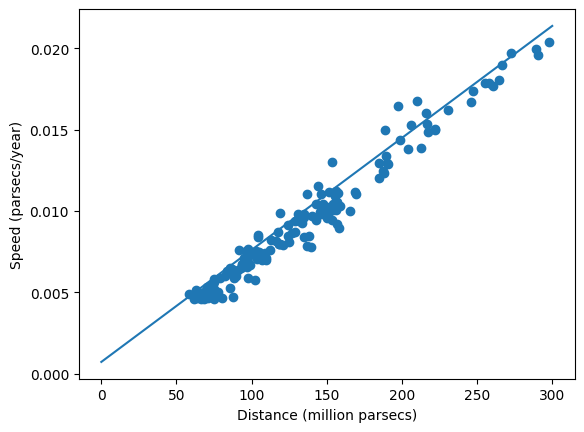

In [9]:
# regressão normalizada
theta_norm =  gd(X_norm, y_norm)
orig_theta = convert_norm_to_orig(theta_norm, X_orig, y_orig)

x_grid = np.linspace(start = 0, stop = 300, num = 1000)
col1 = np.ones(len(x_grid))
col2 = x_grid
X_grid_test = np.column_stack((col1, col2))

# Create the plot
plt.scatter(df['Distance (million parsecs)'], df['Speed (parsecs/year)'])
plt.plot(x_grid, predict(orig_theta, X_grid_test))

# Add labels and a title
plt.xlabel("Distance (million parsecs)")
plt.ylabel("Speed (parsecs/year)")

# Display the plot
plt.show()